In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.lagrangian_datatools import *
import src.data.statistics as ds
plt.rcParams['agg.path.chunksize'] = 10000
import torch

import seaborn as sns
import scienceplots
# style of plots

# use the next line if you want to generate the plots of the report
plt.style.use(['science','nature'])

# modify the next line to get bigger plots
plt.rcParams.update({'figure.dpi': '100'}) #100 for the report


In [2]:
import importlib
importlib.reload(ds)

<module 'src.data.statistics' from '/home/maria/Documents/github/multiscale-turbulence/src/data/statistics.py'>

In [3]:
# tau goes from 1 to 1000
list_taus = np.unique([int(t) for t in np.logspace(0, 3)]).astype(int)
list_n=[2,4,6]

In [4]:
# Original data
orig_fname = "../data/subsampled_velocities.npy"
orig_data = ParticleDataset(npy_filename=orig_fname, root_dir=".")

In [5]:
# comparing with the same number of points
N_GEN_DATA = 10000 
SEED = 42
# Parameters for error bars
SUBSAMPLING_TIMES = 10

# sampling from the original data
np.random.seed(SEED)
idx = np.random.randint(0, len(orig_data), N_GEN_DATA)
orig_stat = ds.StatisticalPhysics(orig_data[idx]) 

# Statistics of data generated with the Scale Invariant Diffusion model

## Linear noise schedule

### Exp 1

This set corresponds to a model trained for 350K steps (~220 epochs), with a learning rate of 1e-05, 50 diffusion steps and 7 levels of resolution.   Training was done with unnormalized 3D trajectories.    
**Model date**: 20230720  
**Model JOB ID**: 0000001

In [9]:
# Loading the data
filename = "../experiments/20230720/0000001/generated_samples_3d.npy"

In [6]:

new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [7]:
len(new_d)

2048

In [8]:
# one sample
sample_1 = new_d[10]
print(sample_1.shape)
print(sample_1)


(2000, 3)
[[-2.7518935   3.5635862  -1.074496  ]
 [ 2.130226   -1.699055    0.53489494]
 [ 0.9968602  -1.5134883   0.96187943]
 ...
 [ 0.2236251   0.25053948  0.4031075 ]
 [ 0.07968895  0.19475067 -0.9140829 ]
 [-0.05588321  0.40490973 -0.12692457]]


In [9]:
sample_1[:,0].shape

(2000,)

Text(0.5, 0, 't')

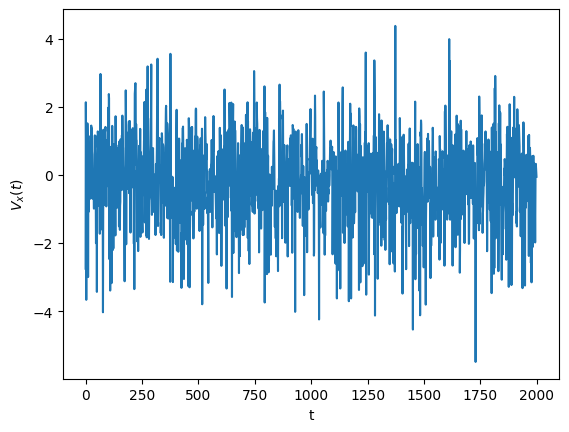

In [10]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

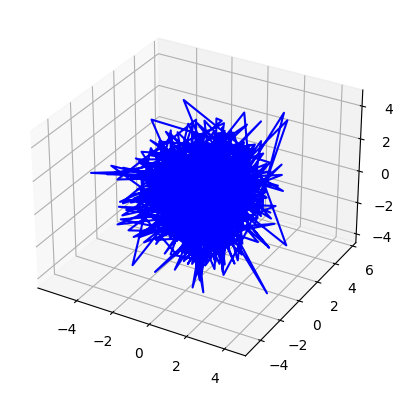

In [11]:
ax = plt.axes(projection='3d')
ax.plot3D(sample_1[:,0], sample_1[:,1], sample_1[:,2], 'blue')

In [12]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])

In [13]:
new_d.data.shape

(2048, 2000, 3)

In [14]:
stat.trajectory[:,:, 0].shape

(1000, 2000)

## Lagrangian structures

$$
S_n(\tau) = \left \langle (\delta_{\tau}V)^n \right \rangle
$$

$\tau$ is defined as the range of integers between $10^0$ and $10^3$

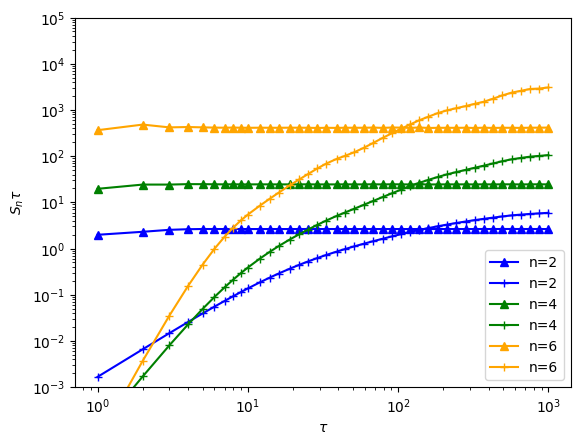

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

$$
F_n(\tau) = \frac{\left \langle (\delta_{\tau}V)^n \right \rangle}{\left \langle (\delta_{\tau}V)^{n/2} \right \rangle ^2}
$$

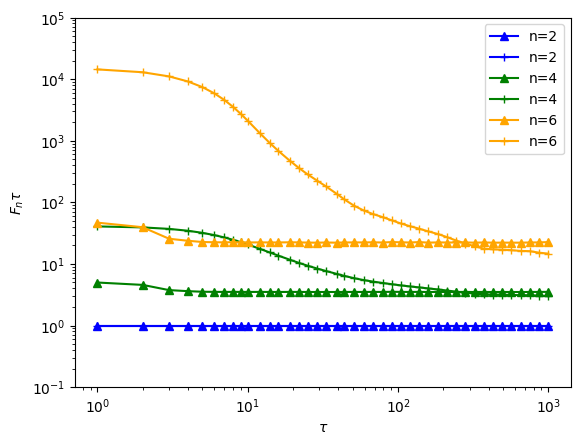

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

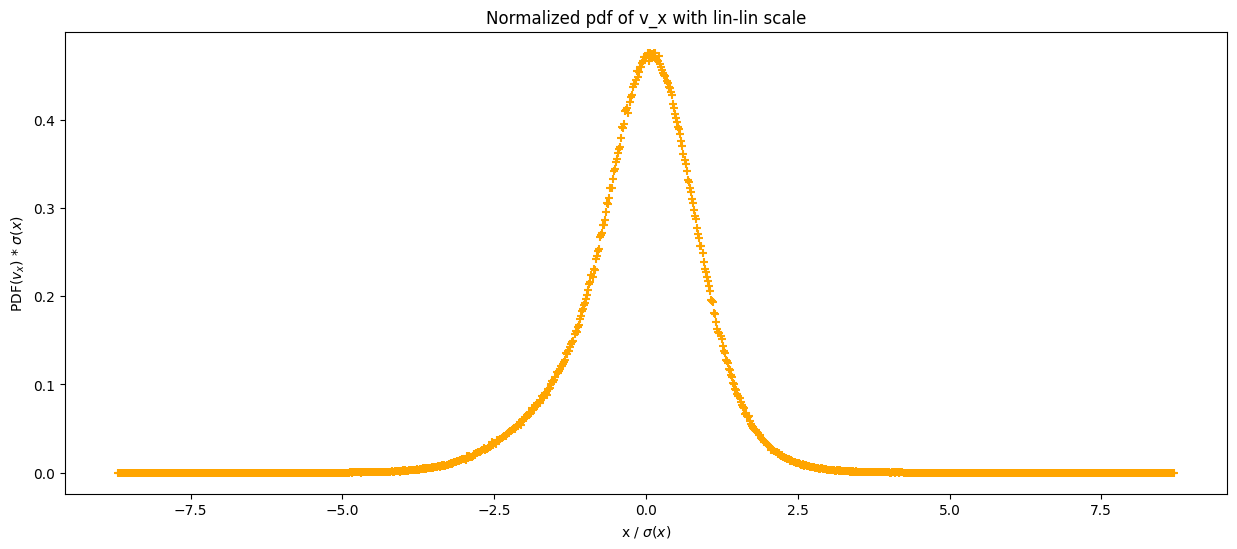

In [17]:
stat.plot_vx_norm_pdf(y_log=False)

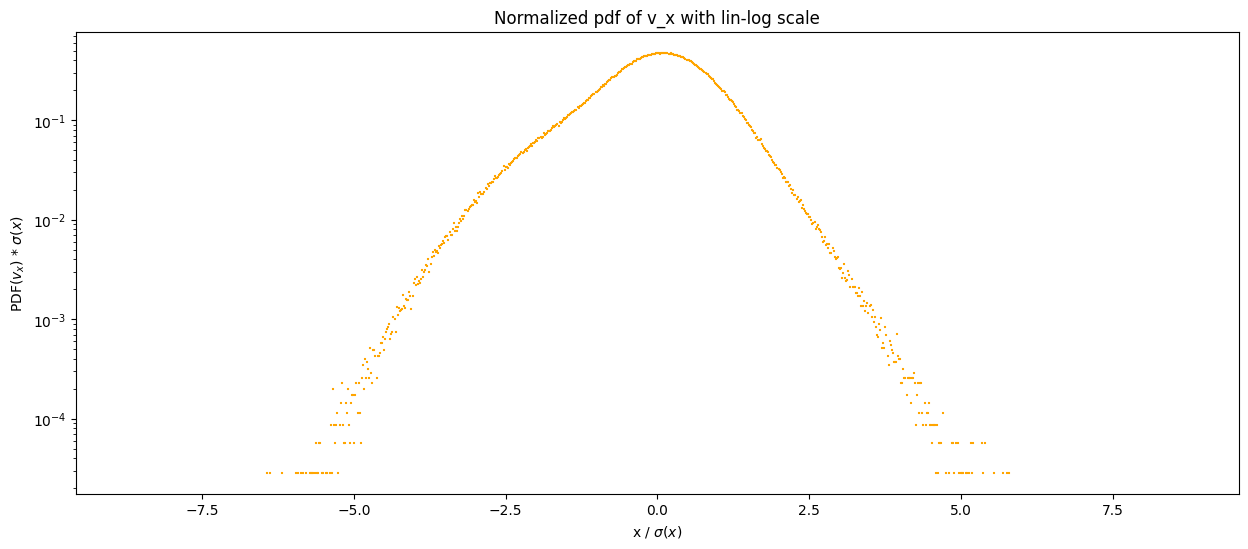

In [18]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True, s=1)

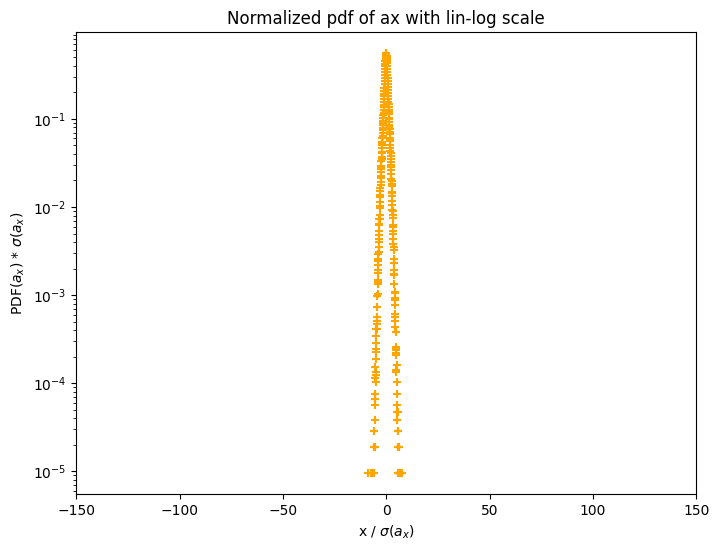

In [19]:
stat.plot_ax_norm_pdf()

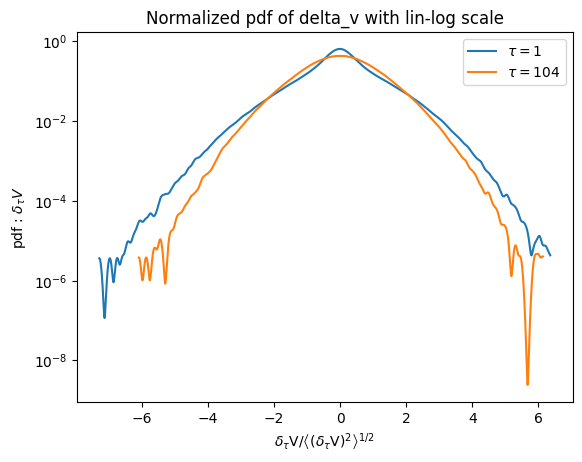

In [20]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

### Exp 2

**Model date**: 20230821  
**Model JOB ID**: 1359824  

This experiment corresponds to a model trained for 700K steps (~900 epochs), with a learning rate of 1e-05 and batch size of 64. It is similar to the model 20230720/0000001, with difference that here we **increase** from **50 to 800 diffusion steps**, and we used normalized data for training.

We generated 10K samples.

In [6]:
# Loading the data
filename = "../experiments/20230821/1359824/generated_samples_3d.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

Text(0.5, 0, 't')

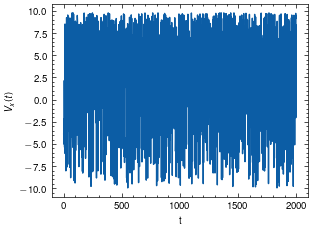

In [7]:
# one sample
sample_1 = new_d[10]
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

The generated data looks more noisy! This is unexpected, as this model trained with normalized data, for more steps, and with more diffusion steps, we would have expected to be better than the previous baseline.

In [8]:
stat = ds.StatisticalPhysics(new_d)

## Lagrangian structures

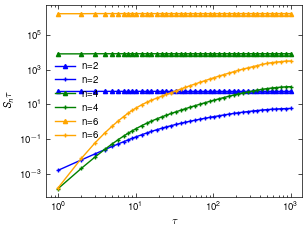

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='.', color=colors[i])

plt.legend()
plt.show()

As expected, the curves are bad; they look like contants, and there is a constant factor that allows to recover the rest of the curves.

Plot with error bars:
- use subsampling method, subsampling 10 timesfrom the set of generated data.
- compute the standard error and the mean of the measure of interest which in our case is the flatness.

In [12]:
subsamples = []

In [13]:
flatness_2 = {"values": [], "sd": None, "mean": None}
flatness_4 = {"values": [], "sd": None, "mean": None}
flatness_6 = {"values": [], "sd": None, "mean": None}

for _ in range(SUBSAMPLING_TIMES):
    subsample_idx = np.random.choice(len(new_d), N_GEN_DATA, replace=True)
    subsample = new_d[subsample_idx]
    subsamples.append(subsample)
    temp_stat = ds.StatisticalPhysics(subsample)
    for i,n in enumerate(list_n):
        tau, fn_tau = temp_stat.compute_flatness_function(n, coordinate=0)
        if n == 2:
            flatness_2["values"].append(fn_tau)
        elif n == 4:
            flatness_4["values"].append(fn_tau)
        elif n == 6:
            flatness_6["values"].append(fn_tau)

In [19]:
# compute mean and standard error
# for each tau
# we can vertically stack the values and then compute the mean and std per column
flatness_2["values"] = np.vstack(flatness_2["values"])
flatness_4["values"] = np.vstack(flatness_4["values"])
flatness_6["values"] = np.vstack(flatness_6["values"])

flatness_2["mean"] = np.mean(flatness_2["values"], axis=0)
flatness_2["sd"] = np.std(flatness_2["values"], axis=0)
flatness_4["mean"] = np.mean(flatness_4["values"], axis=0)
flatness_4["sd"] = np.std(flatness_4["values"], axis=0)
flatness_6["mean"] = np.mean(flatness_6["values"], axis=0)
flatness_6["sd"] = np.std(flatness_6["values"], axis=0)

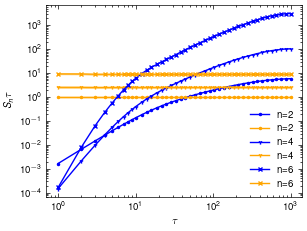

In [28]:
bootstrapped_stat = {2: flatness_2, 4: flatness_4, 6: flatness_6}
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of markers for each n
markers = [".", "1", "x"]
for i,n in enumerate(list_n):
    # Original data will have markers '.'
    tau, sn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker=markers[i], color="blue")
    # plot the mean and standard error
    ax.plot(tau, bootstrapped_stat[n]["mean"], label=r"n=" + str(n), marker=markers[i], color="orange")
    ax.fill_between(tau, bootstrapped_stat[n]["mean"] - bootstrapped_stat[n]["sd"], bootstrapped_stat[n]["mean"] + bootstrapped_stat[n]["sd"], alpha=0.5, color="orange")
plt.legend()


So the standard deviation is too small to be plotted.

<div style="border-bottom: 1px solid black;"></div>

# New scheduler experiments

The next expriments use a new noise schedule, tanh61. All of the models were trained with the following parameters:
- learning rate of 1e-05
- 5 levels of resolution 
- 800 diffusion steps
- 128 channels for the first convolutional layer of each block

## Exp 1
This experiments corresponds to a model trained with scaled trajectories with **one velocity component**, for 700K steps (~900 epochs).  
**Model date**: 20230804  
**Model JOB ID**: 13121704

In [14]:
# Loading the data
filename = "../experiments/20230804/1321704/generated_samples_1d.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [16]:
# one sample
sample_1 = new_d[10]
sample_1.shape

(2000, 1)

Text(0.5, 0, 't')

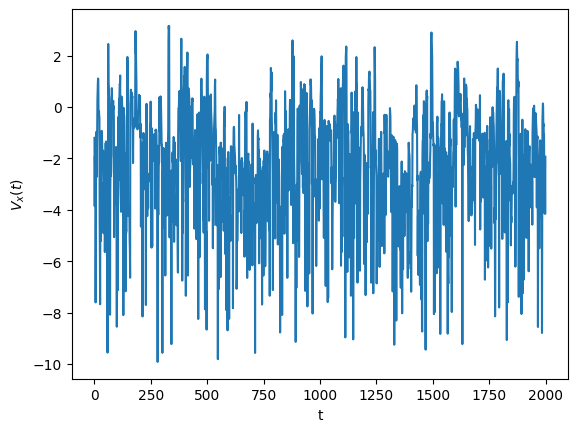

In [17]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

In [18]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

## Lagrangian structures

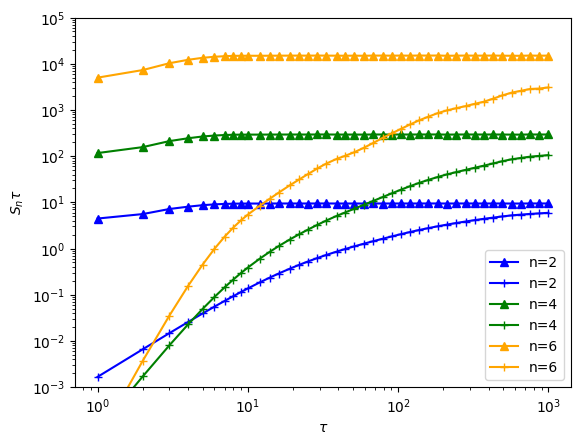

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

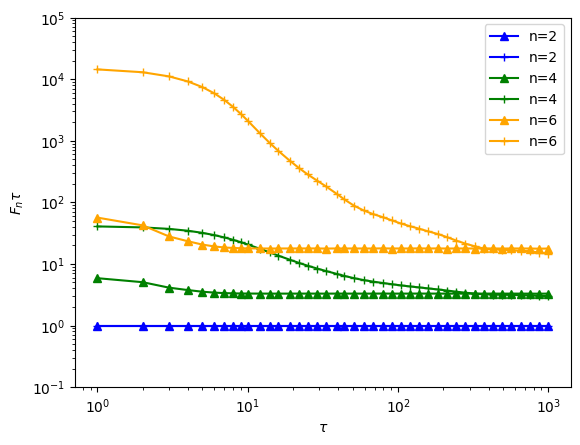

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

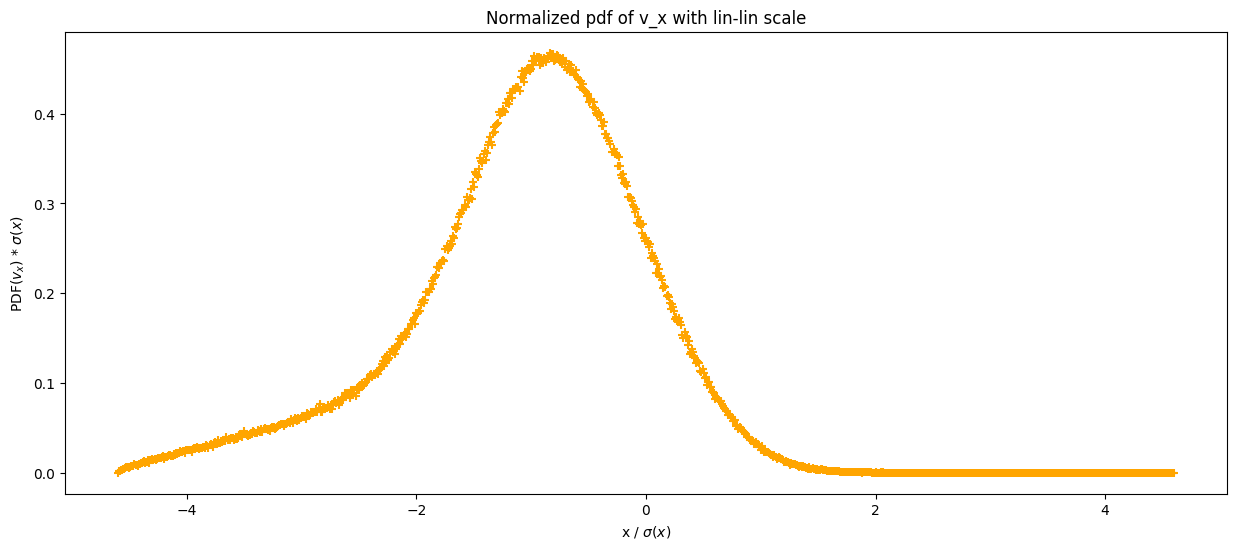

In [21]:
stat.plot_vx_norm_pdf(y_log=False)

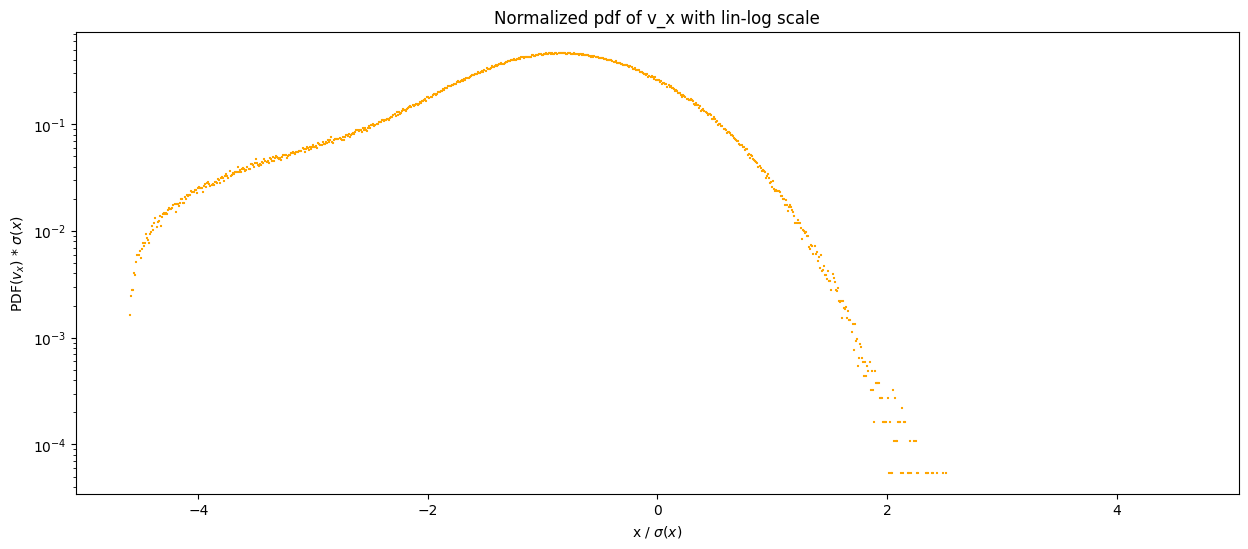

In [22]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True, s=1)

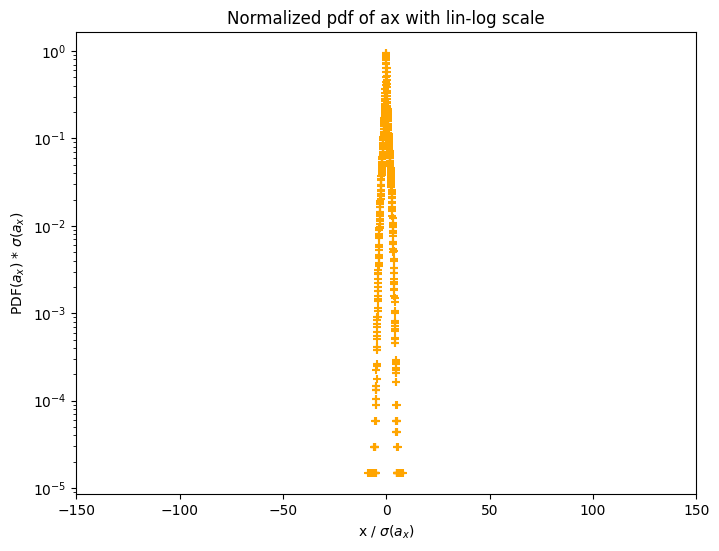

In [23]:
stat.plot_ax_norm_pdf()

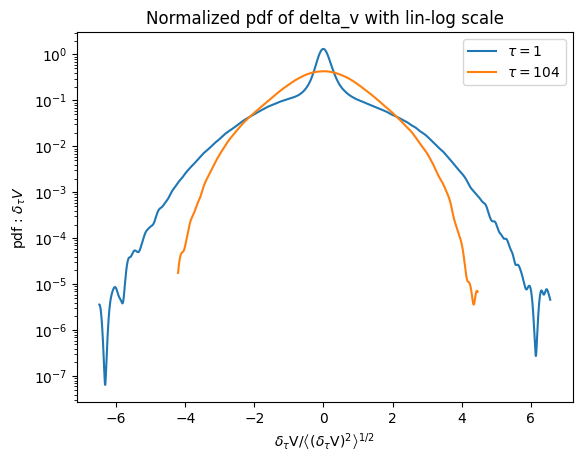

In [25]:
stat.plot_several_tau_delta_velocity(list_taus[::25s], coordinate=0, clip=(-20,20), y_log=True)

## Exp 2
This experiments corresponds to a model trained with scaled trajectories with all the velocity component, for 700K steps (~900 epochs).  
**Model date**: 20230804  
**Model JOB ID**: 13121869

In [6]:
# Loading the data
filename = "../experiments/20230804/1321869/generated_samples_3d.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [7]:
# one sample
sample_1 = new_d[10]
sample_1.shape

(2000, 3)

Text(0.5, 0, 't')

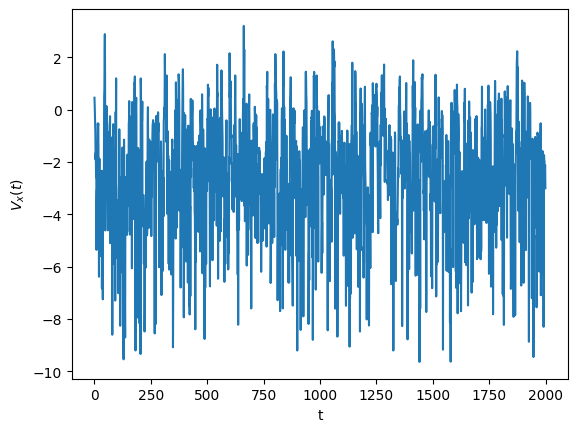

In [18]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

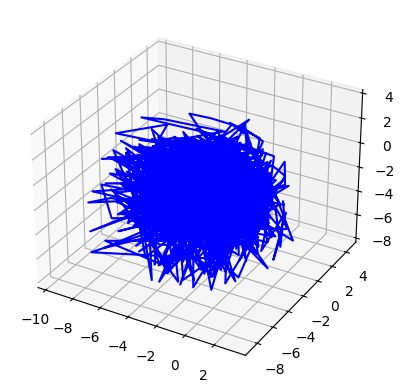

In [29]:
ax = plt.axes(projection='3d')
ax.plot3D(sample_1[:,0], sample_1[:,1], sample_1[:,2], 'blue')

In [20]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

## Lagrangian structures

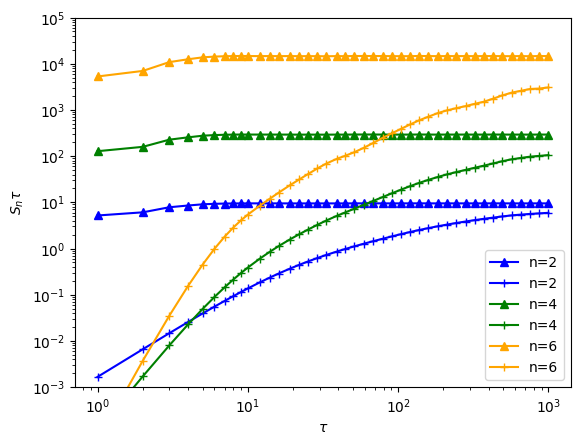

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

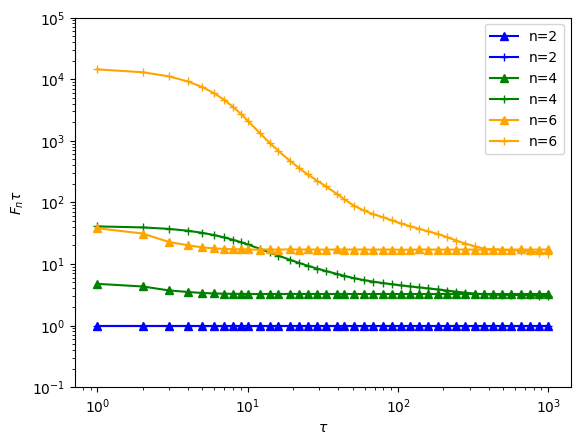

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

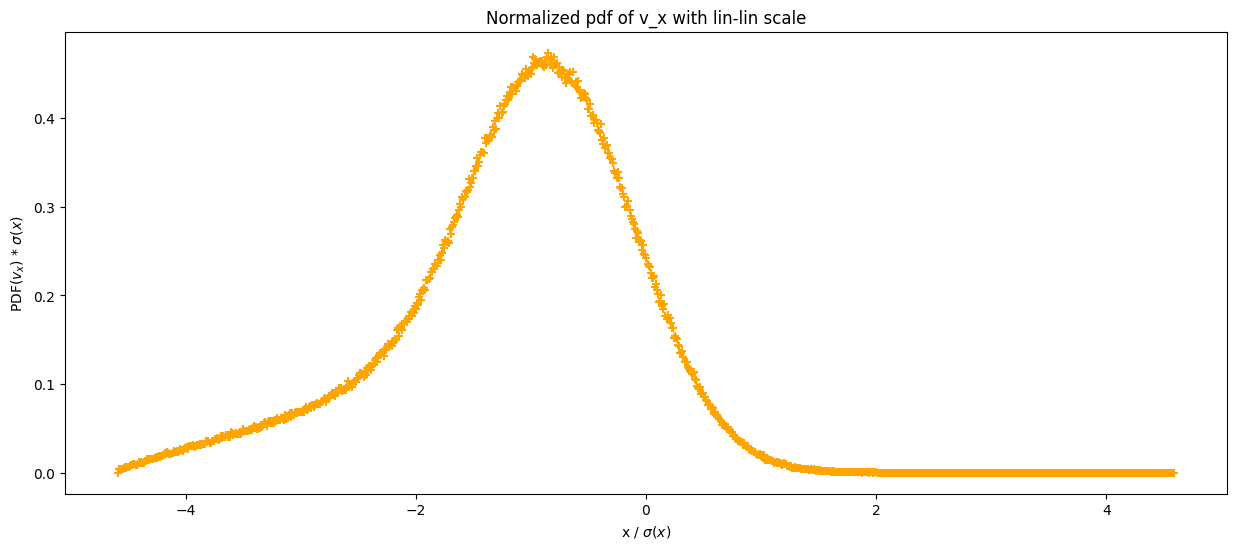

In [33]:
stat.plot_vx_norm_pdf(y_log=False)

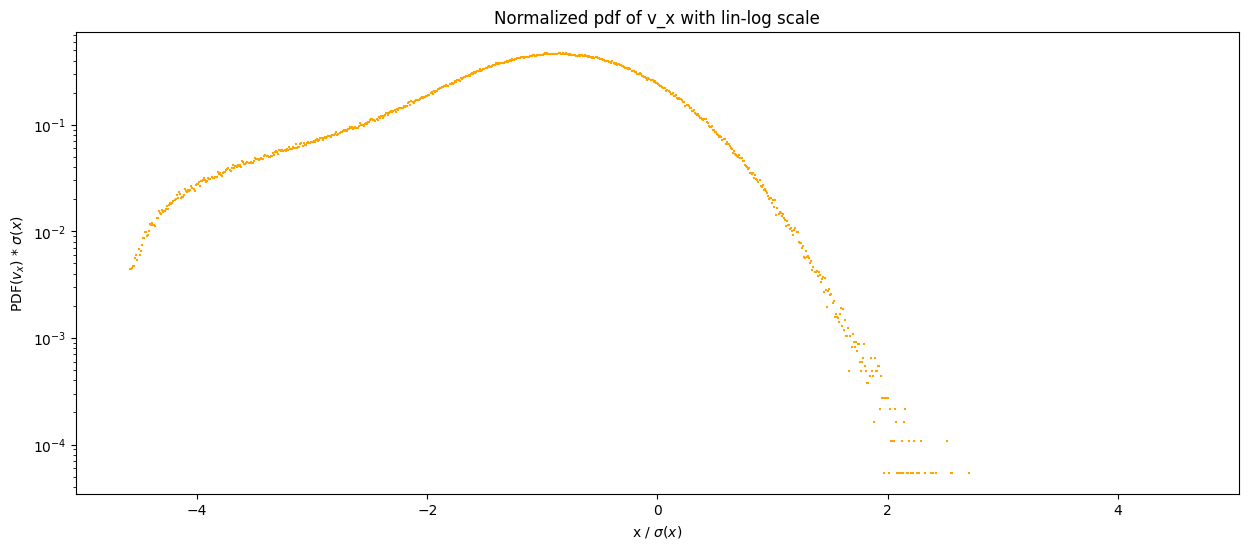

In [34]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True, s=1)

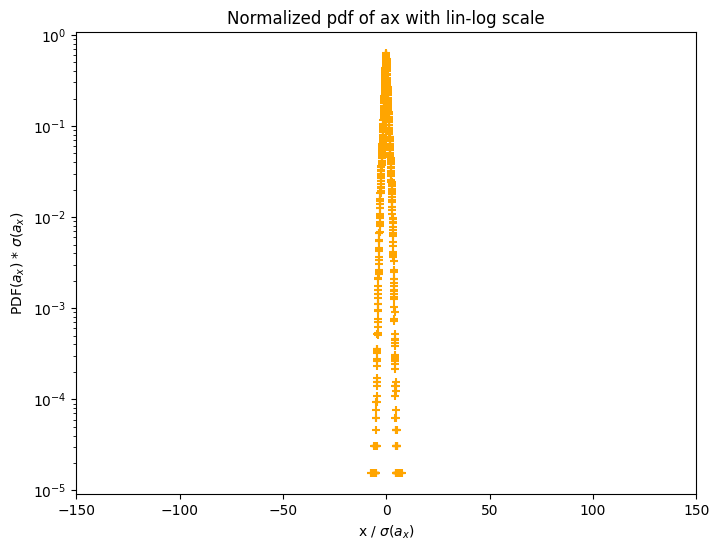

In [35]:
stat.plot_ax_norm_pdf()

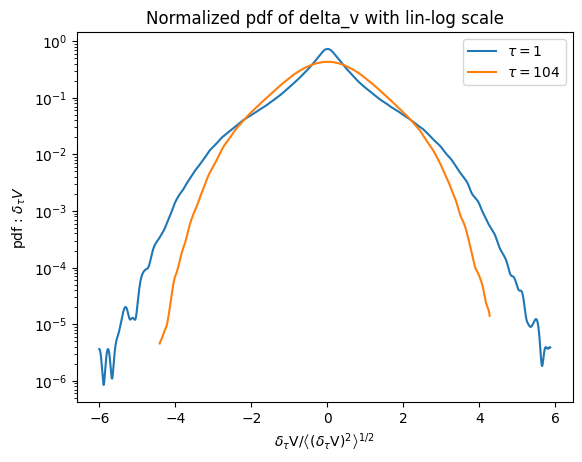

In [36]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

## Exp 3
This experiments corresponds to a model trained with scaled trajectories with all the velocity component, for 300K steps (~200 epochs), using attention at every block, between the convolutions.  
**Model date**: 20230815  
**Model JOB ID**: 1349393

In [7]:
# Loading the data
filename = "../experiments/20230815/13449393/generated_samples_200epochs.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [8]:
# one sample
sample_1 = new_d[10]
sample_1.shape

(2000, 3)

Text(0.5, 0, 't')

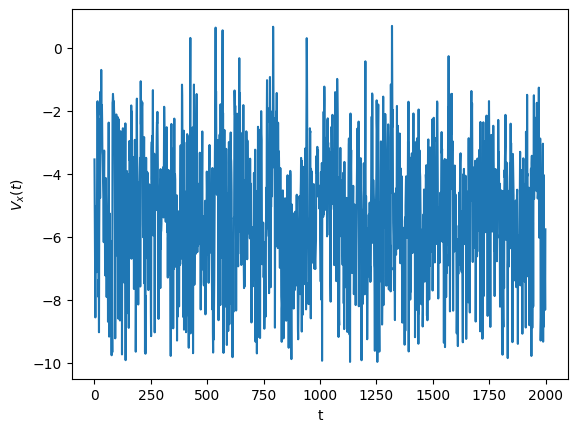

In [9]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

In [10]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

## Lagrangian structures

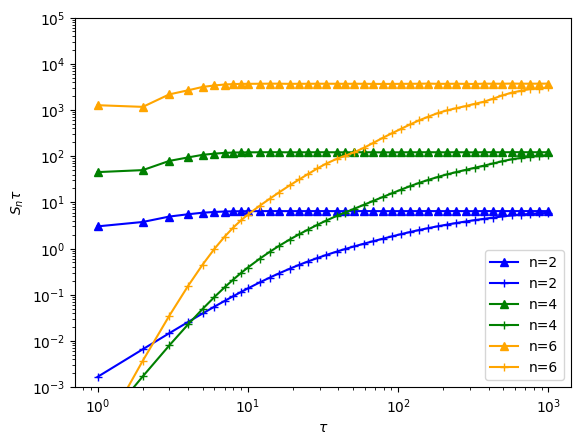

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

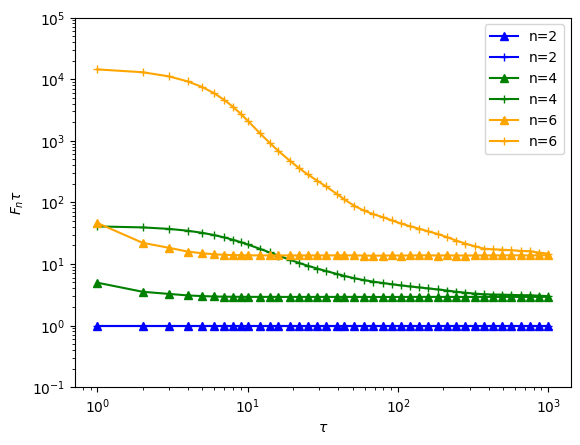

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

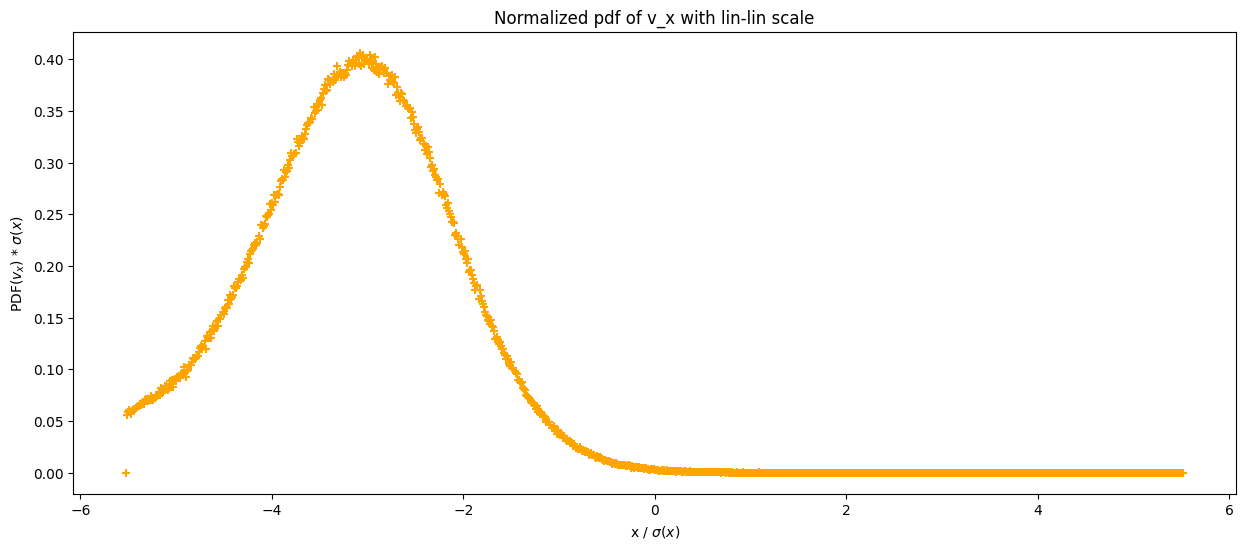

In [13]:
stat.plot_vx_norm_pdf(y_log=False)

we can see that the mean of the distributions tends to shift more and more to the left; we can investigate this by plotting the mean of the samples when generating them, at certain noise value, throught the whole sampling process.